<a href="https://colab.research.google.com/github/khansaintania/2025_VISI_KOMPUTER_TI2B/blob/main/Jobsheet_02_Klasifikasi_Gambar_Visi_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

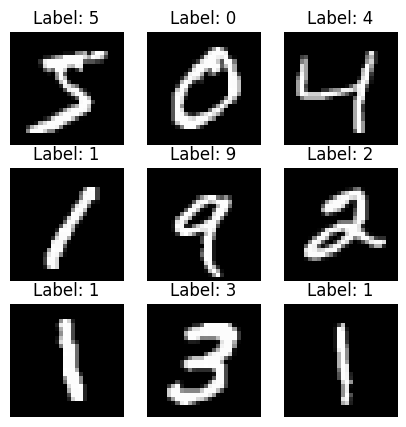

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

Tugas kecil: Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


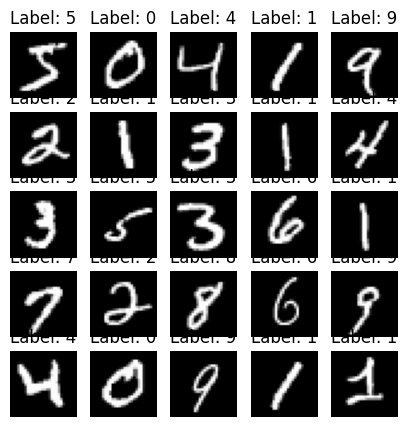

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [2]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9101


Tugas kecil: Ubah kernel dari linear menjadi rbf

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM dengan kernel RBF
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi (RBF):", accuracy_score(y_test, y_pred))


Akurasi (RBF): 0.9513


## Praktikum D3: Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8896 - loss: 0.3660 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9785 - loss: 0.0698 - val_accuracy: 0.9832 - val_loss: 0.0647
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9858 - loss: 0.0459 - val_accuracy: 0.9847 - val_loss: 0.0530
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9865 - val_loss: 0.0498
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9858 - val_loss: 0.0521


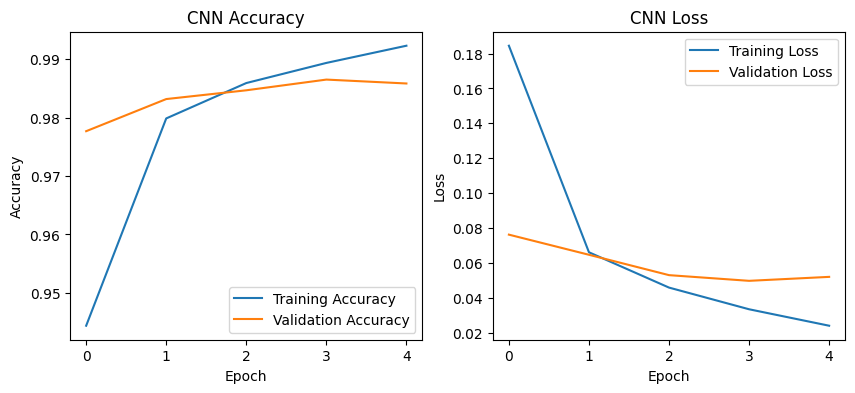

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Tugas kecil: Menambahkan satu lapisan Conv2D lagi sebelum Flatten

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.9119 - loss: 0.2896 - val_accuracy: 0.9867 - val_loss: 0.0486
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 32ms/step - accuracy: 0.9851 - loss: 0.0462 - val_accuracy: 0.9858 - val_loss: 0.0525
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9902 - val_loss: 0.0345
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9870 - val_loss: 0.0475
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9908 - val_loss: 0.0396


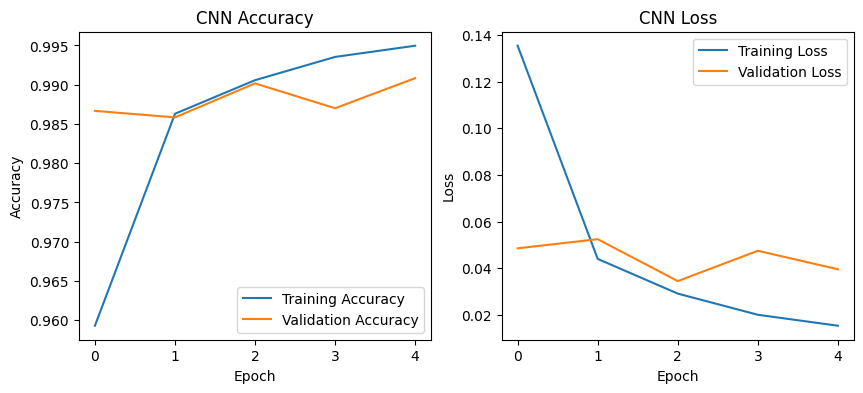

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    # Tambahan Conv2D kedua
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D4: D4 Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 51ms/step - accuracy: 0.3674 - loss: 1.7203 - val_accuracy: 0.5476 - val_loss: 1.2786
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.5701 - loss: 1.2036 - val_accuracy: 0.6314 - val_loss: 1.0503
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.6480 - loss: 1.0109 - val_accuracy: 0.6616 - val_loss: 0.9846
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.6818 - loss: 0.9107 - val_accuracy: 0.6868 - val_loss: 0.9168
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7075 - loss: 0.8452 - val_accuracy: 0.7032 - val_loss: 0.8767
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7292 - loss: 0.7801 - val_accuracy: 0.6990 - val_loss: 0.9121
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7511 - loss: 0.7171 - val_accuracy: 0.6970 - val_loss: 0.8914
Epoch 8/10
1407/1407 ━━

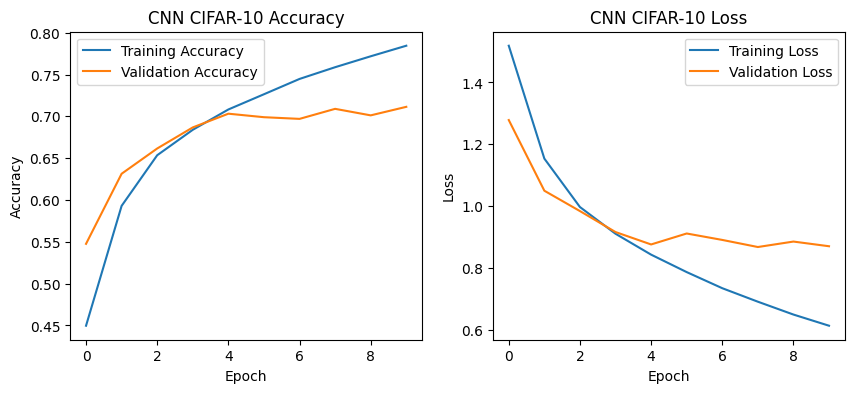

In [6]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
